# Notebook for analysis of rate of return among given bookmakers
Basis for the analysis is given by file **Matches.csv**. The data frame for the further analysis will be called **BK** - as an abbreviation from bookmakers

![Dollar](./Dollars_investopedia.jpg)






Picture source: www.investopedia.com

# Motivation & Assumptions: 
# "By which bookmaker will I get the best rate of return in case that my bet will be correct?"
### I will try to answer this question in this notebook, however meeting some simplifications:
- The analysis is made regardless the country and the league
- The real amount of money which we get back is not analysed. I will just analyse the odds. Taxes and other issues will not be considered
- The analysis is made separately for betting the underdog, the favorite and draw
$$$$$$$$



### 1. Importing the necessary modules and setting display options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
pd.set_option('max_columns', None)
%matplotlib inline

### 2. Data Import and choice of analysis range. Data Cleaning and explanation of notations


The first look over the whole data frame may be a little bit overwhelming:

In [2]:
BK_all = pd.read_csv('Matches.csv')
BK_all.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


The enumerated list of columns:

In [3]:
for i, column in enumerate(BK_all):
    print(i,column)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

Fortunatelly just some of these are necessary:
- id
- season
- home team goal
- away team goal
- all of the odds from bookmakers<br><br><br>    

Hence, only the following import is made:

In [4]:
BK = pd.read_csv('Matches.csv', usecols = [0,3,9,10, *range(85,115)])

Now it would be the time to decide, whether we should analyse all seasons or mayby just some of them.<br>
I would like to perform the analysis just for the last 4 seasons - in my opinion 4 years range is very suitable for football (big transfers after tournaments influence the teams' strength).

In [5]:
Last_4_seasons = sorted((BK.season.value_counts()).index, reverse = True)[0:4]
Last_4_seasons

['2015/2016', '2014/2015', '2013/2014', '2012/2013']

In [6]:
BK.head()

,id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,2008/2009,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,2008/2009,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,2008/2009,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,2008/2009,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,2008/2009,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
BK = BK.query('season in @Last_4_seasons')

In [8]:
BK.head()

,id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
996,997,2012/2013,1,1,5.25,3.75,1.65,5.00,3.6,1.67,3.80,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.6,1.67,5.00,3.7,1.7,NaN,NaN,NaN,4.5,3.50,1.7
997,998,2012/2013,2,4,2.38,3.25,3.00,2.45,3.3,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.3,2.80,2.38,3.3,2.88,2.40,3.4,2.9,2.45,3.3,2.7,2.4,3.25,2.7
998,999,2012/2013,5,2,1.80,3.60,4.33,1.75,3.7,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.73,3.6,4.50,1.80,3.6,4.5,1.75,3.7,4.2,1.8,3.50,4.0
999,1000,2012/2013,0,1,1.65,3.80,5.00,1.67,3.6,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.6,5.50,1.62,3.6,5.50,1.70,3.7,5.0,1.67,3.6,5.0,1.7,3.50,4.5
1000,1001,2012/2013,4,2,1.50,4.00,7.00,1.53,3.9,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.50,4.0,6.00,1.57,3.9,6.0,1.53,3.9,6.0,1.5,3.80,6.0


It should be checked, whether all of the bookmaker companies have all entries for odds. Should that not be the case - some of them have to be dropped from the analysis. I have decided to set the threshold of 90% - it means, if the number of matches for one company falls below the 90% of the entries for the company which has placed the most of the matches - that bookmaker should be excluded from the data frame 
 

In [9]:
BK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12943 entries, 996 to 25978
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12943 non-null  int64  
 1   season          12943 non-null  object 
 2   home_team_goal  12943 non-null  int64  
 3   away_team_goal  12943 non-null  int64  
 4   B365H           11240 non-null  float64
 5   B365D           11240 non-null  float64
 6   B365A           11240 non-null  float64
 7   BWH             11236 non-null  float64
 8   BWD             11236 non-null  float64
 9   BWA             11236 non-null  float64
 10  IWH             11205 non-null  float64
 11  IWD             11205 non-null  float64
 12  IWA             11205 non-null  float64
 13  LBH             11217 non-null  float64
 14  LBD             11217 non-null  float64
 15  LBA             11217 non-null  float64
 16  PSH             11168 non-null  float64
 17  PSD             11168 non-nul

In [10]:
#Dropping out the companies, which have considerable fewer entries
Series_to_drop = []

BK.shape
Betting_len = (BK.iloc[:,4:33]).count().max()

for index,series in enumerate(BK):
        if BK[series].count() < 0.90*Betting_len:
            Series_to_drop.append(BK[series].name)


BK.drop(Series_to_drop, axis = 1, inplace = True)

BK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12943 entries, 996 to 25978
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12943 non-null  int64  
 1   season          12943 non-null  object 
 2   home_team_goal  12943 non-null  int64  
 3   away_team_goal  12943 non-null  int64  
 4   B365H           11240 non-null  float64
 5   B365D           11240 non-null  float64
 6   B365A           11240 non-null  float64
 7   BWH             11236 non-null  float64
 8   BWD             11236 non-null  float64
 9   BWA             11236 non-null  float64
 10  IWH             11205 non-null  float64
 11  IWD             11205 non-null  float64
 12  IWA             11205 non-null  float64
 13  LBH             11217 non-null  float64
 14  LBD             11217 non-null  float64
 15  LBA             11217 non-null  float64
 16  PSH             11168 non-null  float64
 17  PSD             11168 non-nul

**We still have some null values - however their amount is not so big anymore - they will be dropped**

In [11]:
BK.dropna(inplace = True)
BK.reset_index(inplace = True)
BK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           11095 non-null  int64  
 1   id              11095 non-null  int64  
 2   season          11095 non-null  object 
 3   home_team_goal  11095 non-null  int64  
 4   away_team_goal  11095 non-null  int64  
 5   B365H           11095 non-null  float64
 6   B365D           11095 non-null  float64
 7   B365A           11095 non-null  float64
 8   BWH             11095 non-null  float64
 9   BWD             11095 non-null  float64
 10  BWA             11095 non-null  float64
 11  IWH             11095 non-null  float64
 12  IWD             11095 non-null  float64
 13  IWA             11095 non-null  float64
 14  LBH             11095 non-null  float64
 15  LBD             11095 non-null  float64
 16  LBA             11095 non-null  float64
 17  PSH             11095 non-null 

**Now we have data set of 11095 matches in the last 4 seasons**<br>
**All of the bookmakres in the data frame have placed all of the matches**<br>
**Below clarification of the column names:**<br>
- BWH:$\;\;\;\;\;\;$Bet Win  home odds
- BWA:$\;\;\;\;\;\;$Bet Win  away odds
- B365H:$\;\;\;\;\;\;$B365 home odds
- B365A:$\;\;\;\;\;\;$B365 away odds
- IWH$\;\;\;\;\;\;$Interwetten home odds
- IWA$\;\;\;\;\;\;$Interwetten away odds
- LBH$\;\;\;\;\;\;$Ladbrokes home odds
- LBA$\;\;\;\;\;\;$Ladbrokes away odds
- PSH$\;\;\;\;\;\;$Pinnacle home odds
- PSA$\;\;\;\;\;\;$Pinnacle away odds
- WHH$\;\;\;\;\;\;$Will Hill home odds
- WHA$\;\;\;\;\;\;$Will Hill away odds
- VCH$\;\;\;\;\;\;$VC Bet home odds
- VCA$\;\;\;\;\;\;$VC Bet away odds

In [12]:
BK.head()

,index,id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,996,997,2012/2013,1,1,5.25,3.75,1.65,5.00,3.6,1.67,3.80,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.7,1.7
1,997,998,2012/2013,2,4,2.38,3.25,3.00,2.45,3.3,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.3,2.80,2.40,3.4,2.9
2,998,999,2012/2013,5,2,1.80,3.60,4.33,1.75,3.7,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.6,4.5
3,999,1000,2012/2013,0,1,1.65,3.80,5.00,1.67,3.6,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.6,5.50,1.70,3.7,5.0
4,1000,1001,2012/2013,4,2,1.50,4.00,7.00,1.53,3.9,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.9,6.0


### 3. Checking if all companies had classified the same underdog and favorite per match
Since I am analysing only the return rate - so the case when one should be lucky in betting, it would be very helpful to know, if all of the companies defined the underdog and favorite in the same way (should be the case, but it will not harm to check). Below the code providing this information:

In [13]:
j = 0
for i in range(0,len(BK)):

    
#The ratio of odds between the home team and away team should be the same for each bookmaker per match

   bwin      =  BK.BWH[i] / BK.BWA[i]
   B365      =  BK.B365H[i] / BK.B365A[i]
   Interwett =  BK.IWH[i] / BK.IWA[i]
   Ladbrokes =  BK.LBH[i] / BK.LBA[i]
   Pinnacle  =  BK.PSH[i] / BK.PSA[i]
   Will_Hill =  BK.WHH[i] / BK.WHA[i]
   VC_Bet    =  BK.VCH[i] / BK.VCA[i]
   
   
   statement_less = bwin < 0 and            \
                    B365 < 0 and            \
                    Interwett < 0 and       \
                    Ladbrokes < 0 and       \
                    Pinnacle < 0 and        \
                    Will_Hill < 0 and       \
                    VC_Bet < 0    
    
   statement_more = bwin > 0 and            \
                    B365 > 0 and            \
                    Interwett > 0 and       \
                    Ladbrokes > 0 and       \
                    Pinnacle > 0 and        \
                    Will_Hill > 0 and       \
                    VC_Bet > 0  
                    
                    
   statement_same = (bwin == B365 == Interwett == Ladbrokes == Pinnacle  \
                            == Will_Hill == VC_Bet) 
                    
   if statement_less or statement_more or statement_same:
       j+=1
   
   
if j == len(BK):
    print('Ok! Each bookmaker made the same statement per match')

Ok! Each bookmaker made the same statement per match


In [14]:
BK.head()

,index,id,season,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,996,997,2012/2013,1,1,5.25,3.75,1.65,5.00,3.6,1.67,3.80,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.7,1.7
1,997,998,2012/2013,2,4,2.38,3.25,3.00,2.45,3.3,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.3,2.80,2.40,3.4,2.9
2,998,999,2012/2013,5,2,1.80,3.60,4.33,1.75,3.7,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.6,4.5
3,999,1000,2012/2013,0,1,1.65,3.80,5.00,1.67,3.6,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.6,5.50,1.70,3.7,5.0
4,1000,1001,2012/2013,4,2,1.50,4.00,7.00,1.53,3.9,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.9,6.0


### 4. Defining a winner per match
At this stage I've prepared an extra column with information which team won the match (or if there was a draw)

In [15]:
Winner = []

for entry in BK.index:
    if BK.home_team_goal[entry] > BK.away_team_goal[entry]:
        result = 'Home'
    elif BK.home_team_goal[entry] < BK.away_team_goal[entry]:
        result = 'Away'
    else:
        result = 'Draw'
        
    Winner.append(result)

Winner = pd.Series(Winner)

Columns home_team_goal, away_team_goal, and index are not required anymore

In [16]:
BK.drop(['home_team_goal', 'away_team_goal', 'index'], inplace = True, axis = 1)

In [17]:
BK['Winner'] = Winner

In [18]:
BK.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner
0,997,2012/2013,5.25,3.75,1.65,5.00,3.6,1.67,3.80,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.7,1.7,Draw
1,998,2012/2013,2.38,3.25,3.00,2.45,3.3,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.3,2.80,2.40,3.4,2.9,Away
2,999,2012/2013,1.80,3.60,4.33,1.75,3.7,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.6,4.5,Home
3,1000,2012/2013,1.65,3.80,5.00,1.67,3.6,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.6,5.50,1.70,3.7,5.0,Away
4,1001,2012/2013,1.50,4.00,7.00,1.53,3.9,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.9,6.0,Home


**At this part of the analysis one more column is appended to the data frame. Namely the one which tells us, whether a favorite or an underdog won the match (draws are also included). Since (as proved in chapter 3) all bookmakers defined the favorite team per match in the same way, we can use an arbitrary company for the code:**

In [19]:
Who_won = []

for entry in BK.index:
    if (BK.Winner[entry] == 'Away' and BK.B365A[entry] < BK.B365H[entry]) or (BK.Winner[entry] == 'Home' and BK.B365H[entry] < BK.B365A[entry]):
        result = 'Favorite'
    elif (BK.Winner[entry] == 'Away' and BK.B365A[entry] > BK.B365H[entry]) or (BK.Winner[entry] == 'Home' and BK.B365H[entry] > BK.B365A[entry]):
        result = 'Underdog'
        
    elif BK.Winner[entry] == 'Draw':
        result = 'Draw'
        
    Who_won.append(result)

In [20]:
Who_won = pd.Series(Who_won)

In [21]:
BK['Who_won'] = Who_won

In [22]:
BK.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner,Who_won
0,997,2012/2013,5.25,3.75,1.65,5.00,3.6,1.67,3.80,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.7,1.7,Draw,Draw
1,998,2012/2013,2.38,3.25,3.00,2.45,3.3,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.3,2.80,2.40,3.4,2.9,Away,Underdog
2,999,2012/2013,1.80,3.60,4.33,1.75,3.7,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.6,4.5,Home,Favorite
3,1000,2012/2013,1.65,3.80,5.00,1.67,3.6,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.6,5.50,1.70,3.7,5.0,Away,Underdog
4,1001,2012/2013,1.50,4.00,7.00,1.53,3.9,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.9,6.0,Home,Favorite


**As it can be observed below, the results make sense - most of the matches were won by favorite team**

In [23]:
BK.Who_won.value_counts()

Favorite    5851
Draw        2811
Underdog    2433
Name: Who_won, dtype: int64

### 5. Introducing data frames with:
- favorite as winner
- underdog as winner
- draw as result

In [24]:
Favorite_wins = BK[BK.Who_won == 'Favorite']
Underdog_wins = BK[BK.Who_won == 'Underdog']

In [25]:
Favorite_wins.reset_index(inplace = True)

In [26]:
Underdog_wins.reset_index(inplace = True)

In [27]:
Favorite_wins = Favorite_wins.drop('index', axis = 1)
Underdog_wins = Underdog_wins.drop('index', axis = 1)

In [28]:
Favorite_wins.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner,Who_won
0,999,2012/2013,1.80,3.60,4.33,1.75,3.7,4.2,1.80,3.2,3.7,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.60,4.50,Home,Favorite
1,1001,2012/2013,1.50,4.00,7.00,1.53,3.9,6.0,1.50,3.7,5.0,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.90,6.00,Home,Favorite
2,1002,2012/2013,1.29,5.25,10.00,1.25,5.5,10.0,1.25,4.5,9.0,1.25,5.0,10.00,1.29,5.74,12.41,1.25,5.0,11.00,1.25,5.50,12.00,Home,Favorite
3,1003,2012/2013,1.30,5.00,11.00,1.30,5.0,9.0,1.30,4.4,7.5,1.29,5.0,9.00,1.37,5.16,9.96,1.30,4.5,9.50,1.29,5.50,10.50,Home,Favorite
4,1009,2012/2013,1.75,3.60,4.60,1.75,3.4,4.2,1.80,3.3,3.8,1.80,3.5,4.00,1.79,3.81,4.75,1.80,3.5,4.00,1.80,3.75,4.75,Home,Favorite


In [29]:
Underdog_wins.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner,Who_won
0,998,2012/2013,2.38,3.25,3.00,2.45,3.3,2.7,2.30,3.1,2.6,2.38,3.20,2.75,2.48,3.52,2.96,2.30,3.3,2.8,2.4,3.4,2.90,Away,Underdog
1,1000,2012/2013,1.65,3.80,5.00,1.67,3.6,5.0,1.65,3.3,4.4,1.67,3.50,4.50,1.74,3.82,5.20,1.57,3.6,5.5,1.7,3.7,5.00,Away,Underdog
2,1006,2012/2013,3.10,3.40,2.25,3.00,3.5,2.4,2.70,3.2,2.3,2.88,3.25,2.25,3.07,3.52,2.37,2.90,3.2,2.3,3.0,3.5,2.38,Home,Underdog
3,1008,2012/2013,2.10,3.40,3.40,2.15,3.3,3.0,2.10,3.2,3.1,2.20,3.25,3.00,2.19,3.63,3.34,2.20,3.2,3.1,2.2,3.5,3.30,Away,Underdog
4,1011,2012/2013,2.10,3.40,3.40,2.05,3.2,3.3,2.00,3.2,3.3,2.00,3.20,3.40,2.09,3.51,3.75,2.05,3.2,3.4,2.1,3.5,3.70,Away,Underdog


**Now it is necessary to simplify the odds of the bookmakers. Only the odds for the winner are required<br>
Since there is a considerable amount of them, it will be useful to use a function.<br>
The procedure for the data frame with favorites as the winners, is given in the next 3 cells:**

In [30]:
List_of_companies = []      #Here the name of the list may be misleading - this is actually the list of home and away
                            #series for each company!
for i,v in enumerate(Favorite_wins): 
    if v.endswith('A') or v.endswith('H'):
        List_of_companies.append(v)

In [31]:
def appending_odds(series_home, series_away,DataFrame):

    odds_list = []
    for entry in DataFrame.index:
        if DataFrame.Winner[entry] == 'Home':
            result = DataFrame[series_home][entry]
        else:
            result = DataFrame[series_away][entry]
            
        odds_list.append(result)

    odds_series = pd.Series(odds_list)

    DataFrame[series_home[:-1]+'_odds'] = odds_series

In [32]:
i = 0 
while i <= len(List_of_companies)-1:
    appending_odds(List_of_companies[i],List_of_companies[i+1], Favorite_wins)
    i+=2

In [33]:
Favorite_wins.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner,Who_won,B365_odds,BW_odds,IW_odds,LB_odds,PS_odds,WH_odds,VC_odds
0,999,2012/2013,1.80,3.60,4.33,1.75,3.7,4.2,1.80,3.2,3.7,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.5,4.33,1.80,3.60,4.50,Home,Favorite,1.80,1.75,1.80,1.73,1.83,1.73,1.80
1,1001,2012/2013,1.50,4.00,7.00,1.53,3.9,6.0,1.50,3.7,5.0,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.8,6.00,1.57,3.90,6.00,Home,Favorite,1.50,1.53,1.50,1.50,1.58,1.50,1.57
2,1002,2012/2013,1.29,5.25,10.00,1.25,5.5,10.0,1.25,4.5,9.0,1.25,5.0,10.00,1.29,5.74,12.41,1.25,5.0,11.00,1.25,5.50,12.00,Home,Favorite,1.29,1.25,1.25,1.25,1.29,1.25,1.25
3,1003,2012/2013,1.30,5.00,11.00,1.30,5.0,9.0,1.30,4.4,7.5,1.29,5.0,9.00,1.37,5.16,9.96,1.30,4.5,9.50,1.29,5.50,10.50,Home,Favorite,1.30,1.30,1.30,1.29,1.37,1.30,1.29
4,1009,2012/2013,1.75,3.60,4.60,1.75,3.4,4.2,1.80,3.3,3.8,1.80,3.5,4.00,1.79,3.81,4.75,1.80,3.5,4.00,1.80,3.75,4.75,Home,Favorite,1.75,1.75,1.80,1.80,1.79,1.80,1.80


**Actually we need only the last seven columns for the further analysis:**

In [34]:
Favorite_wins = Favorite_wins.iloc[:,-7:]

In [35]:
Favorite_wins.rename(columns = {'B365_odds': 'B365', 
                                'BW_odds'  : 'bwin',
                                'IW_odds'  : 'Interwetten',
                                'LB_odds'  : 'Ladbrokes', 
                                'PS_odds'  : 'Pinnacle Sports',
                                'WH_odds'  : 'William Hill', 
                                'VC_odds'  : 'BetVictor'}, inplace = True)

In [36]:
Favorite_wins.head()

,B365,bwin,Interwetten,Ladbrokes,Pinnacle Sports,William Hill,BetVictor
0,1.80,1.75,1.80,1.73,1.83,1.73,1.80
1,1.50,1.53,1.50,1.50,1.58,1.50,1.57
2,1.29,1.25,1.25,1.25,1.29,1.25,1.25
3,1.30,1.30,1.30,1.29,1.37,1.30,1.29
4,1.75,1.75,1.80,1.80,1.79,1.80,1.80


**The approach for the "underdogs data frame" is the same**

In [37]:
List_of_companies = []
for i,v in enumerate(Underdog_wins):
    if v.endswith('A') or v.endswith('H'):
        List_of_companies.append(v)

In [38]:
i = 0 
while i <= len(List_of_companies)-1:
    appending_odds(List_of_companies[i],List_of_companies[i+1], Underdog_wins)
    i+=2

In [39]:
Underdog_wins = Underdog_wins.iloc[:,-7:]

In [40]:
Underdog_wins.rename(columns = {'B365_odds': 'B365', 
                                'BW_odds'  : 'bwin',
                                'IW_odds'  : 'Interwetten',
                                'LB_odds'  : 'Ladbrokes', 
                                'PS_odds'  : 'Pinnacle Sports',
                                'WH_odds'  : 'William Hill', 
                                'VC_odds'  : 'BetVictor'}, inplace = True)

In [41]:
Underdog_wins.head()

,B365,bwin,Interwetten,Ladbrokes,Pinnacle Sports,William Hill,BetVictor
0,3.0,2.7,2.6,2.75,2.96,2.8,2.9
1,5.0,5.0,4.4,4.50,5.20,5.5,5.0
2,3.1,3.0,2.7,2.88,3.07,2.9,3.0
3,3.4,3.0,3.1,3.00,3.34,3.1,3.3
4,3.4,3.3,3.3,3.40,3.75,3.4,3.7


**In case of draw the situation is simplified - we just need to drop the columns the names of which do not end with "D" :**

In [42]:
Draws = BK[BK.Who_won == 'Draw']
Draws.head()

,id,season,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Winner,Who_won
0,997,2012/2013,5.25,3.75,1.65,5.00,3.60,1.67,3.8,3.3,1.75,4.50,3.5,1.67,5.10,3.82,1.76,4.50,3.5,1.70,5.00,3.7,1.70,Draw,Draw
7,1004,2012/2013,1.67,3.75,5.00,1.65,3.75,4.75,1.7,3.3,4.00,1.67,3.6,4.50,1.76,3.93,4.85,1.57,3.8,5.00,1.70,3.8,4.80,Draw,Draw
8,1005,2012/2013,1.73,3.60,4.75,1.75,3.60,4.00,1.7,3.4,4.20,1.73,3.4,4.33,1.76,4.00,4.73,1.80,3.3,4.33,1.75,3.9,4.75,Draw,Draw
10,1007,2012/2013,3.20,3.40,2.20,2.95,3.50,2.10,3.1,3.2,2.10,2.88,3.4,2.20,3.15,3.64,2.28,3.10,3.3,2.15,3.12,3.6,2.25,Draw,Draw
13,1010,2012/2013,1.67,3.60,5.50,1.70,3.50,4.40,1.7,3.4,4.20,1.67,3.6,4.50,1.65,4.01,5.79,1.67,3.5,4.80,1.67,3.9,5.50,Draw,Draw


In [43]:
[Draws.drop(x, axis = 1, inplace = True) for x in copy.copy(Draws) if not x.endswith('D')]

C:\Users\x\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [44]:
Draws.rename(columns =          {'B365D': 'B365', 
                                'BWD'  : 'bwin',
                                'IWD'  : 'Interwetten',
                                'LBD'  : 'Ladbrokes', 
                                'PSD'  : 'Pinnacle Sports',
                                'WHD'  : 'William Hill', 
                                'VCD'  : 'BetVictor'}, inplace = True)

C:\Users\x\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
Draws.head()

,B365,bwin,Interwetten,Ladbrokes,Pinnacle Sports,William Hill,BetVictor
0,3.75,3.60,3.3,3.5,3.82,3.5,3.7
7,3.75,3.75,3.3,3.6,3.93,3.8,3.8
8,3.60,3.60,3.4,3.4,4.00,3.3,3.9
10,3.40,3.50,3.2,3.4,3.64,3.3,3.6
13,3.60,3.50,3.4,3.6,4.01,3.5,3.9


### 6. Calculating mean and standard deviation for each data frame and drawing conclusions:
- Bookmakers-Rate_of_return-Comparison for betting correctly on favorite
- Bookmakers-Rate_of_return-Comparison for betting correctly on underdog
- Bookmakers-Rate_of_return-Comparison for betting correctly on draw

In [46]:
Mean_Rate_of_Return_Betting_Draws = Draws.mean()
Mean_Rate_of_Return_Betting_Draws

B365               3.679744
bwin               3.590494
Interwetten        3.501814
Ladbrokes          3.600637
Pinnacle Sports    3.834159
William Hill       3.504561
BetVictor          3.761242
dtype: float64

In [47]:
Std_Rate_of_Return_Betting_Draws = Draws.std()
Std_Rate_of_Return_Betting_Draws

B365               0.795296
bwin               0.721911
Interwetten        0.593394
Ladbrokes          0.733926
Pinnacle Sports    0.931574
William Hill       0.702439
BetVictor          0.869360
dtype: float64

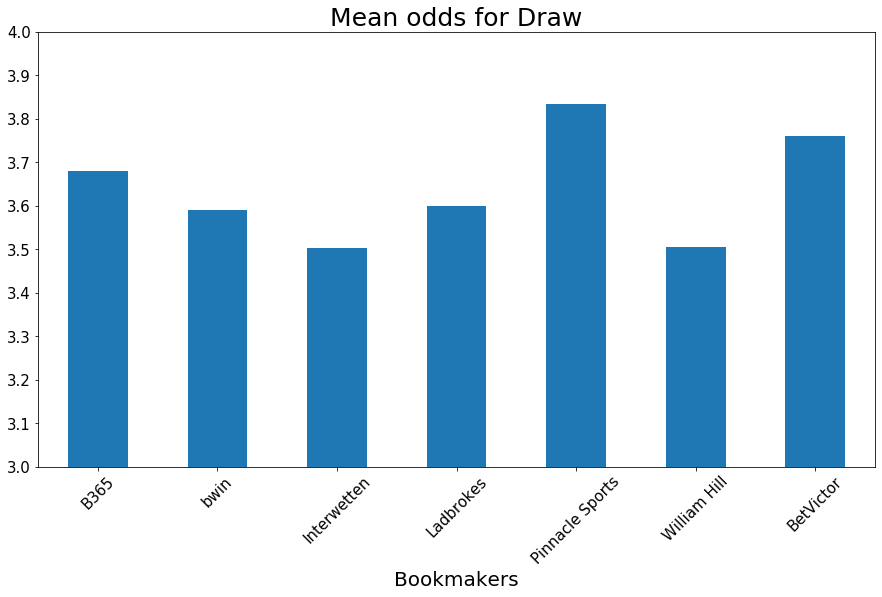

In [48]:
plt.rcParams.update({'font.size': 15})
ax = plt.gca()
Mean_Rate_of_Return_Betting_Draws.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(3,4)
plt.yticks(np.arange(3, 4.1, 0.1))
plt.title('Mean odds for Draw', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

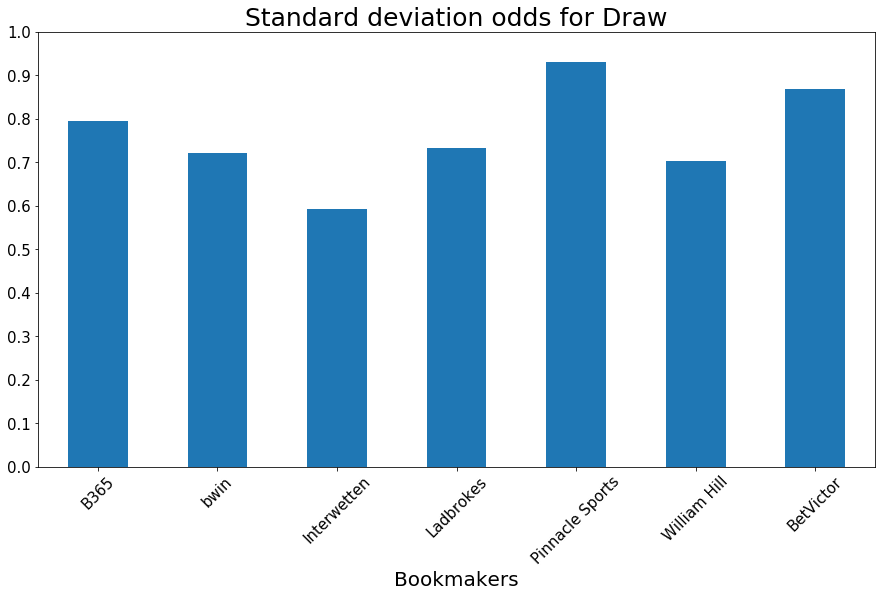

In [49]:
Std_Rate_of_Return_Betting_Draws.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Standard deviation odds for Draw', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

In [50]:
#Ladbrokes better than William Hill
#Risky version of draw - Pinnacle Sports

In [51]:
Mean_Rate_of_Return_Betting_Favorite = Favorite_wins.mean()
Mean_Rate_of_Return_Betting_Favorite

B365               1.804304
bwin               1.803013
Interwetten        1.799815
Ladbrokes          1.802353
Pinnacle Sports    1.845985
William Hill       1.829062
BetVictor          1.837490
dtype: float64

In [52]:
Std_Rate_of_Return_Betting_Favorite = Favorite_wins.std()
Std_Rate_of_Return_Betting_Favorite

B365               0.427090
bwin               0.426875
Interwetten        0.416459
Ladbrokes          0.420903
Pinnacle Sports    0.447097
William Hill       0.436552
BetVictor          0.445088
dtype: float64

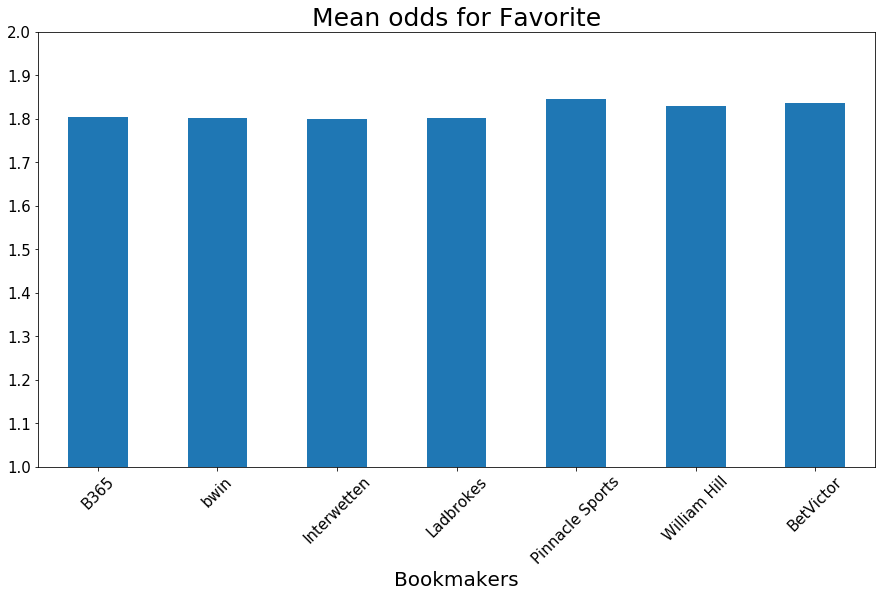

In [53]:
Mean_Rate_of_Return_Betting_Favorite.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(1,2)
plt.yticks(np.arange(1, 2.1, 0.1));
plt.title('Mean odds for Favorite', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

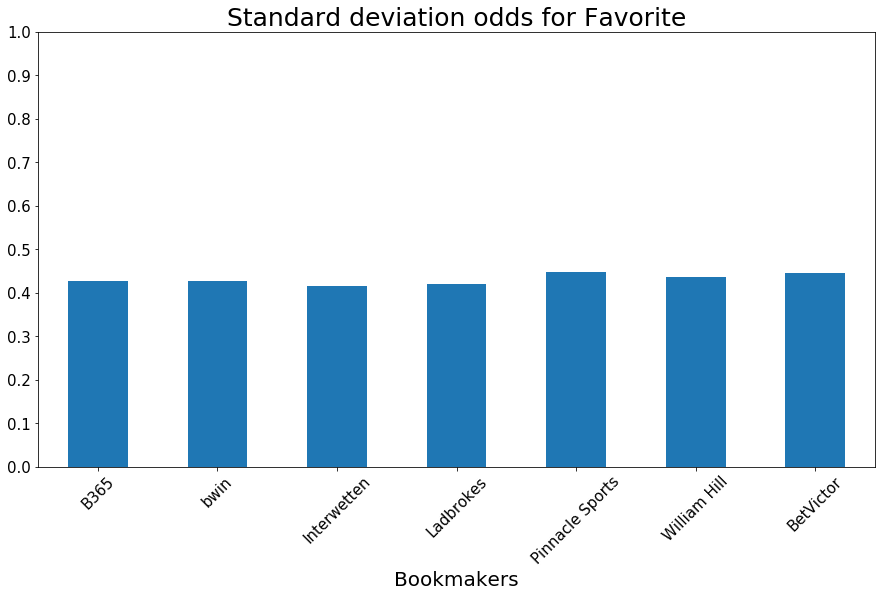

In [54]:
Std_Rate_of_Return_Betting_Favorite.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, 0.1));
plt.title('Standard deviation odds for Favorite', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

In [55]:
Mean_Rate_of_Return_Betting_Underdog = Underdog_wins.mean()
Mean_Rate_of_Return_Betting_Underdog

B365               4.164048
bwin               3.983551
Interwetten        3.820271
Ladbrokes          4.040908
Pinnacle Sports    4.396075
William Hill       4.057020
BetVictor          4.312733
dtype: float64

In [56]:
Std_Rate_of_Return_Betting_Underdog = Underdog_wins.std()
Std_Rate_of_Return_Betting_Underdog

B365               1.973767
bwin               1.746788
Interwetten        1.590472
Ladbrokes          1.921491
Pinnacle Sports    2.289453
William Hill       1.926173
BetVictor          2.274260
dtype: float64

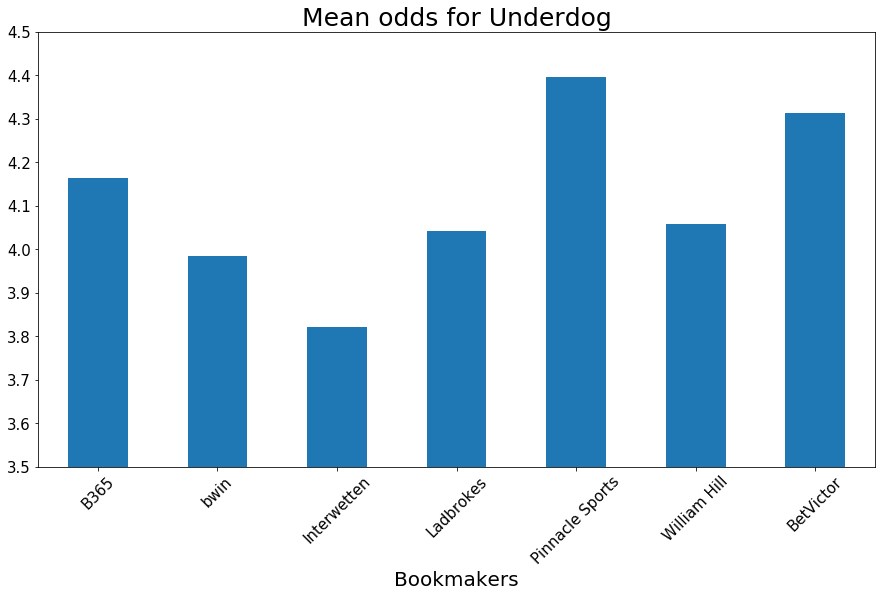

In [57]:
Mean_Rate_of_Return_Betting_Underdog.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(3.5,4.5)
plt.yticks(np.arange(3.5, 4.6, 0.1));
plt.title('Mean odds for Underdog', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

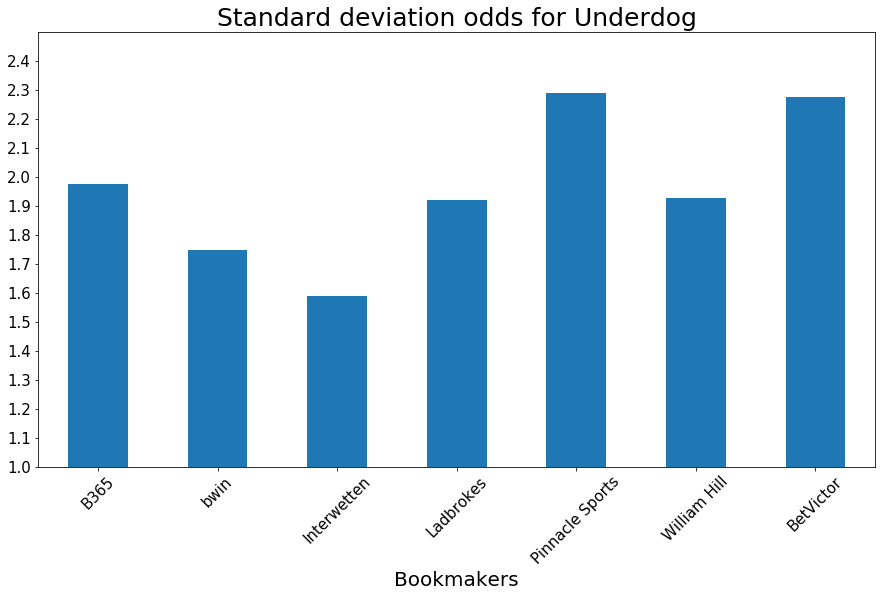

In [58]:
Std_Rate_of_Return_Betting_Underdog.plot(kind = 'bar', figsize = (15,8) )
plt.xticks(rotation = 45)
plt.ylim(1,2.5)
plt.yticks(np.arange(1, 2.5, 0.1));
plt.title('Standard deviation odds for Underdog', fontsize = 25)
plt.xlabel('Bookmakers', fontsize = 20);

### The conclusion could be stated as follows:
**Unfortunatelly, there is no clear best "rate of return provider".<br><br>
In case of betting on <span style="color:red">draw or underdog</span>, one could try to go to Pinnacle Sports or BetVictor. This companies have the highest means for odds. On the other hand the standard deviations there are also high. It is possible to get the high rate of return when betting with help of these brokers, but we also have to be lucky regarding the time we choose. High standard deviations tell us, that the high odds are not always the fact by Pinnacle Sports or BetVictor. If we want to have more certainity, we should choose other bookmaker - in example Interwetten. However, the mean value of odds is much smaller in their case.**<br><br>
**Speaking about the betting on <span style="color:red">favorite</span> - it seems that it doesn't matter where do we go to bet in this case. All companies have similliar or almost the same values for means and standard deviations** 